# .

In [1]:
# this code enables the automated feedback. If you remove this, you won't get any feedback
# so don't delete this cell!
try:
  import AutoFeedback
except (ModuleNotFoundError, ImportError):
  !pip install git+https://github.com/abrown41/AutoFeedback@notebook
  import AutoFeedback

try:
  from testsrc import test_main
except (ModuleNotFoundError, ImportError):
  # !pip install "git+https://github.com/autofeedback-exercises/exercises.git@testpip#subdirectory=MTH1025/algorithms/monte-carlo/part3"
  from testsrc import test_main
 
def runtest(tlist):
  import unittest
  from contextlib import redirect_stderr
  from os import devnull
  with redirect_stderr(open(devnull, 'w')):
    suite = unittest.TestSuite()
    for tname in tlist:
      suite.addTest(eval(f"test_main.UnitTests.{tname}"))
    runner = unittest.TextTestRunner()
    try:
      runner.run(suite)
    except (AssertionError, ImportError):
      pass


The code to plot the circle and square and the thousand, randomly generated points therein, is already included for you below.

We now need to add a step to our algorithm, and amend our code, to distinguish bewteen the points inside or outside the circle. From the preceding exercises you should have arrived at a condition of the form 

$$ x^2 + y^2 < 1$$

for a point $(x, y)$ inside the circle. We can thus amend our algorithm as follows

1. Set up empty lists `xin`, `yin`, `xout` and `yout`. 
2. REPEAT 1000 times:
      1. SET `x` equal to a random number drawn from the uniform distribution between -1 and 1.
      2. SET `y` equal to a random number drawn from the uniform distribution bewteen -1 and 1. 
      3. IF the point lies within the circle
               - append `x` to `xin` and `y` to `yin`.
         ELSE
               - append `x` to `xout` and `y` to `yout`.
3. Plot the points (`xin, yin`) using red dots.
4. Plot the points (`xout, yout`) using blue dots.

To generate a uniform random variable between the limits `a` and `b` use `np.random.uniform(a, b)`

(Note, as before, there are certainly quicker ways of doing this, but stick with this method for now)


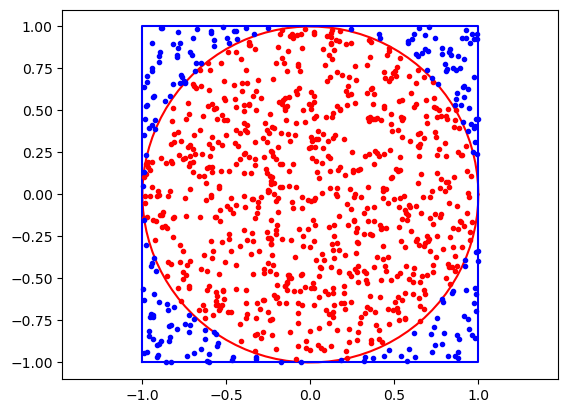

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# this is the code from part 1 

theta = np.linspace(0, 2*np.pi, 100)
x = np.cos(theta)
y = np.sin(theta)
plt.plot(x,y,'r')
xsq = [-1, 1, 1, -1, -1]
ysq = [-1, -1, 1, 1, -1]
plt.plot(xsq, ysq, 'b')
plt.axis('equal')

# you're going to edit this code as per the instructions above

xin, xout, yin, yout = [], [], [], []
for _ in range(1000):
    xpt = np.random.uniform(-1,1)
    ypt = np.random.uniform(-1.0,1.0)
    if (xpt*xpt + ypt*ypt) < 1:
        xin.append(xpt)
        yin.append(ypt)
    else:
        xout.append(xpt)
        yout.append(ypt)

plt.plot(xin, yin, 'r.')
plt.plot(xout, yout, 'b.')




# This line is needed for the automated feedback, don't remove it!
fighand = plt.gca()

In [9]:
runtest(["test_numpoints", "test_xlist", "test_ylist", "test_plot"])

Dataset circle plotted correctly!


Dataset square plotted correctly!


Dataset interior plotted correctly!


Dataset exterior plotted correctly!


Plot is correct!


